# Data Visualization for Machine Learning

This notebook demonstrates the initial visualization and analysis of data for a machine learning project. The goal is to better understand the structure of the data, including sample characteristics, class distribution, and prepare for an efficient train-test split.

## Importing Libraries

Let's start by importing the necessary libraries for data manipulation and visualization.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import cv2
from tqdm import tqdm
from sklearn.utils import shuffle
from skimage.io import imread, imshow
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
import keras.callbacks
from keras.callbacks import ModelCheckpoint
import random
from keras.applications import vgg16
from keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2024-06-16 17:23:54.495011: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 17:23:55.534405: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 17:23:58.193065: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 17:24:04.404001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Label and load the dataset¶

In [2]:
train_dir = './seg_train'
test_dir = './seg_test'

## Assign class labels

In [3]:
class_names = ['buildings','forest','glacier','mountain','sea','street']
class_labels = {class_name:i for i, class_name in enumerate(class_names)}
print(class_labels)

number_classes = len(class_names)

IMAGE_SIZE = (150,150)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


## Usecase of os.listdir and os.path.join functions

In [4]:
for folder in os.listdir(train_dir):
    print(f'{folder}: {len(os.listdir(os.path.join(train_dir,folder)))} images')
    files_path = []
    for file in os.listdir(os.path.join(train_dir,folder)):
        files_path.append(file)

street: 2382 images
mountain: 2512 images
glacier: 2404 images
sea: 2274 images
buildings: 2191 images
forest: 2271 images


## Load Dataset Function

In [5]:
# define load_dataset function to load dataset with labels
def load_dataset():
    
    '''
        Load the data:
            -14,034 images for training the model
            -3,000 images to evaluate how accurately the model learned to classify images
    '''
    
    # create list of datasets
    datasets = [train_dir, test_dir]
    output = []
    
    for dataset in datasets:
        
        images1 = []
        labels1 = []
        print(f"loading {dataset}")
        
        for folder in os.listdir(dataset):
            # assign labels to each folder images
            label = class_labels[folder]
            for file in tqdm(os.listdir(os.path.join(dataset,folder))):
                image_path = os.path.join(os.path.join(dataset, folder), file)
                # read the image files stored in image_path
                image_file = cv2.imread(image_path)
                image_file = cv2.cvtColor(image_file, cv2.COLOR_BGR2RGB)
                image_file = cv2.resize(image_file, IMAGE_SIZE)
                
                images1.append(image_file)
                labels1.append(label)
                
        # convert the images and labels list to numpy array
        images1 = np.array(images1, dtype = 'float32')
        labels1 = np.array(labels1, dtype = 'int32')
        
        output.append((images1, labels1))
        print("Images file have been loaded")
                
    return output

In [6]:
# load the data using above functions
((train_images, train_labels), (test_images, test_labels)) = load_dataset()

print(f"Number of training images: {train_images.shape[0]}")
print(f"Number of training labels: {train_labels.shape[0]}")
print(f"Number of testing images: {test_images.shape[0]}")
print(f"Number of testing labels: {test_labels.shape[0]}")

loading ./seg_train


100%|██████████| 2271/2271 [00:06<00:00, 335.14it/s]


Images file have been loaded
loading ./seg_test


100%|██████████| 474/474 [00:06<00:00, 72.75it/s] 

Images file have been loaded
Number of training images: 14034
Number of training labels: 14034
Number of testing images: 3000
Number of testing labels: 3000


## Pre-process and explore image datasets


In [7]:
# shuffle the train nad test datasets
(train_images, train_labels) = shuffle(train_images, train_labels, random_state=45)


: 

In [7]:
(test_images, test_labels) = shuffle(test_images, test_labels, random_state=45)

In [8]:
# normalize the images dataset
trn_images_norm = train_images/255.0
tst_images_norm = test_images/255.0

In [10]:
# let's see proportion of classes in train and test dataset
def proportion_labels(labels, dataset):
    series = pd.DataFrame(labels).reset_index()
    series.rename(columns = {0:'labels'}, inplace=True)
    final_s = series.groupby('labels').count().reset_index()                                          
    ticks1= [key for key in class_labels.keys()]
    
    # plot the pie chart and bar graph of labels
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.bar(np.array(final_s['labels']), np.array(final_s['index']))
    plt.xticks(ticks=np.array(final_s['labels']), labels=ticks1, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.grid(visible=True)
    plt.title("Number of images per class", size=14, weight='bold')
    
    #add label with the exact number of images in each class
    for i in range(len(final_s)):
        plt.text(i, final_s['index'][i], final_s['index'][i], ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    plt.subplot(122)
    plt.pie(final_s['index'].ravel(),
            labels=ticks1,
            autopct='%1.2f%%',
            textprops={'fontweight':'bold'}
           )
    plt.title("proportion of classes", size=14, weight='bold')
    
    plt.suptitle(f"Proportion of {dataset} data", size=20, weight='bold')
    plt.show()
    
    return final_s

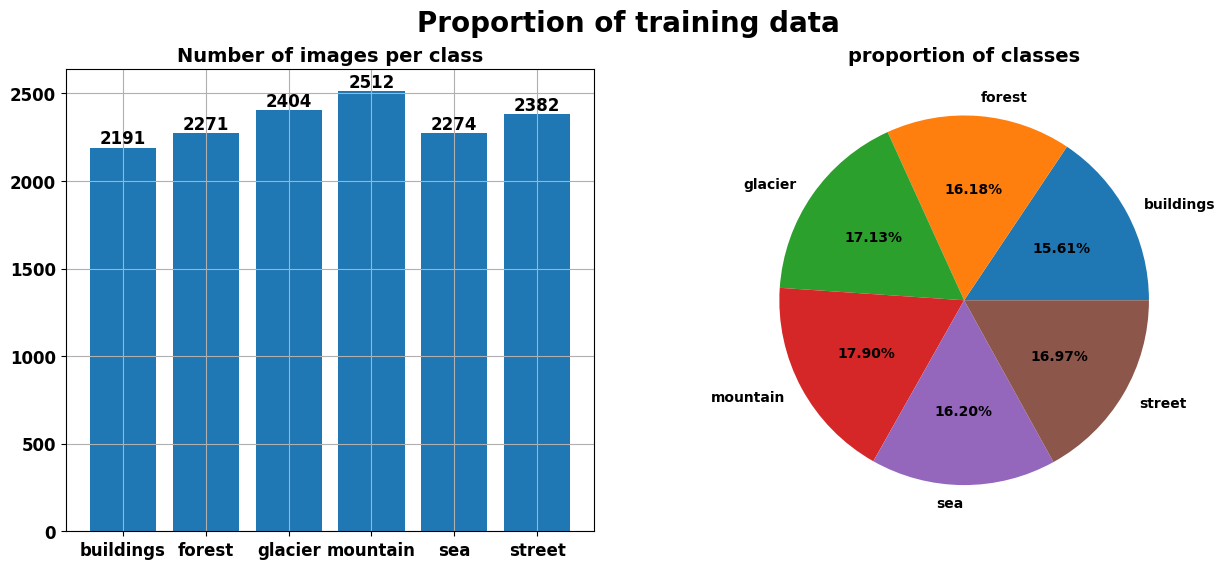

In [13]:
final_s = proportion_labels(train_labels, "training")

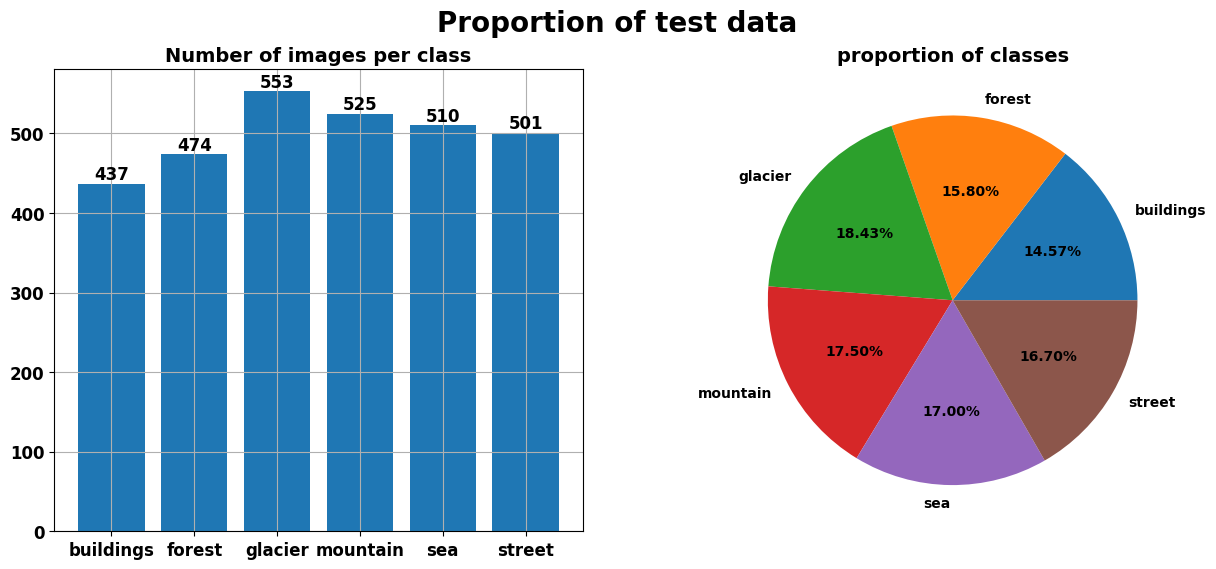

In [14]:
test_d = proportion_labels(test_labels, "test")


## Images Samples and Labels

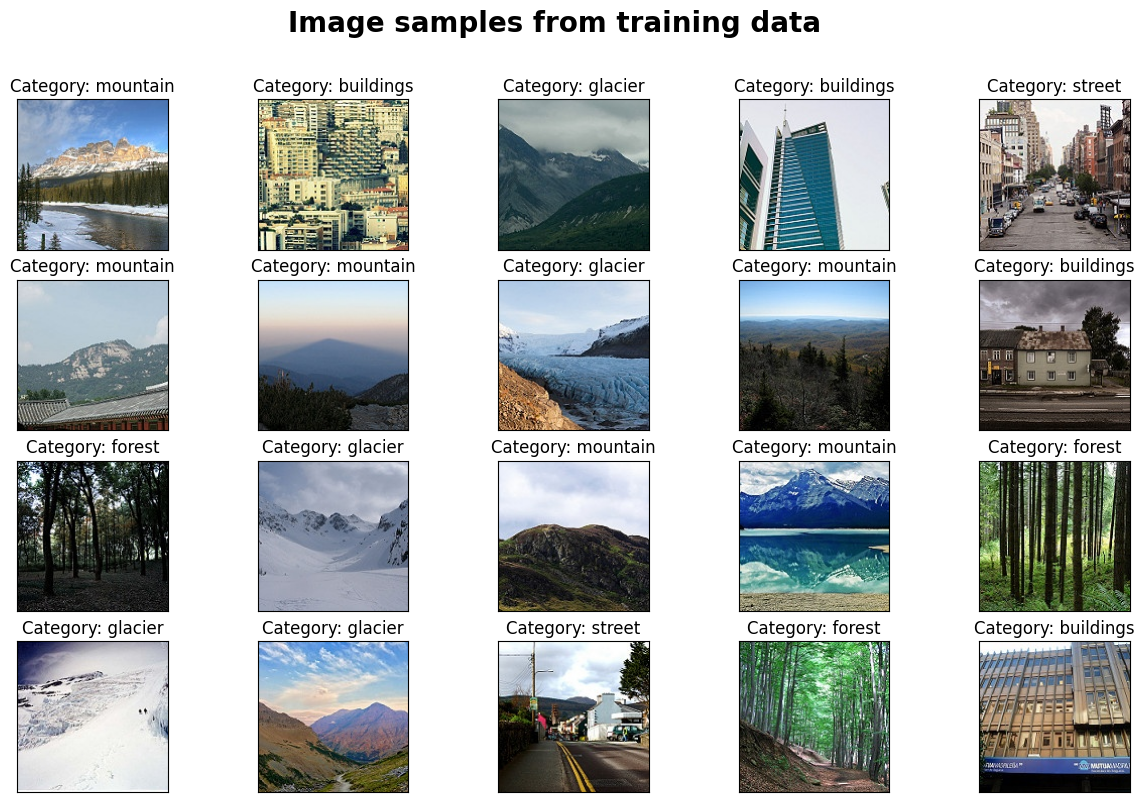

In [16]:
## plot 3*5 visualization of images
plt.figure(figsize=(15,9))
for idx, label in enumerate(train_labels[:20]):
    plt.subplot(4,5, idx+1)
    plt.imshow(trn_images_norm[idx])
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Category: {class_names[label]}')   
    
plt.suptitle(f'Image samples from training data', size=20, weight='bold')
plt.show()

## Mean Image Analysis

In this section, we calculate the mean image for each category. This can help us understand the general characteristics of each class.

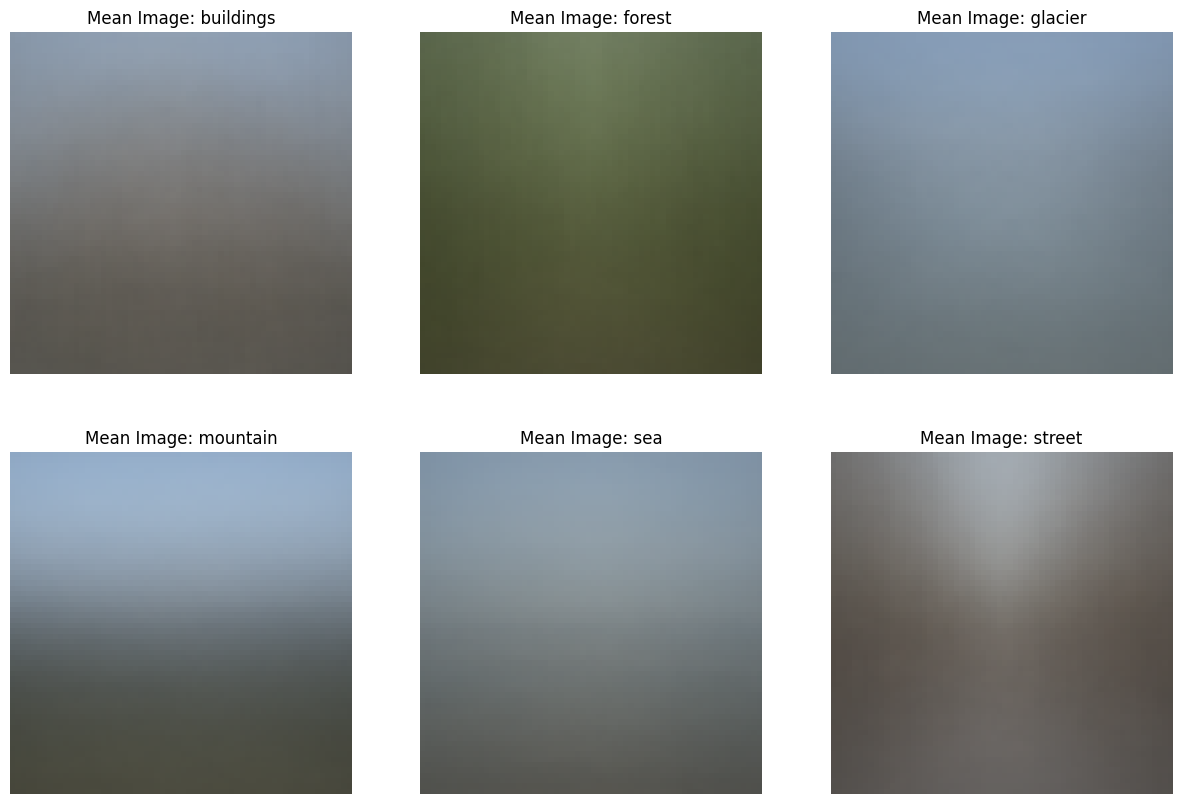

In [18]:
from PIL import Image

# Calculate mean image for each category
def calculate_mean_image(category, img_size=(64, 64)):
    category_path = os.path.join(train_dir, category)
    images = []
    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        img = Image.open(img_path).resize(img_size)
        img_array = np.array(img)
        images.append(img_array)
    mean_image = np.mean(images, axis=0)
    return mean_image

# Display mean images
plt.figure(figsize=(15, 10))
for i, category in enumerate(class_names):
    mean_image = calculate_mean_image(category)
    plt.subplot(2, 3, i + 1)
    plt.imshow(mean_image.astype(np.uint8))
    plt.title(f'Mean Image: {category}')
    plt.axis('off')
plt.show()

### Understanding and Improving the Mean Image Analysis

The mean image analysis, as performed in your code, calculates the average pixel values for each category of images. This approach tends to produce blurred images that represent the overall color and brightness distribution of the category, but lacks distinct details. Here's how to understand what these images are showing and how we can improve the analysis to gain more insights:

#### What the Mean Images Show

1. **General Color and Brightness Distribution**:
    - **Buildings**: The mean image shows a mix of colors, likely indicating the varied nature of buildings with different colors and materials.
    - **Forest**: The mean image appears green, reflecting the predominant color of trees and vegetation.
    - **Glacier**: The mean image is light blue/white, indicating the bright, icy nature of glaciers.
    - **Mountain**: The mean image shows a mix of green and blue, reflecting vegetation and sky.
    - **Sea**: The mean image is bluish, consistent with the color of water.
    - **Street**: The mean image shows a grayish tone, indicative of asphalt and urban environments.

#### Limitations of the Current Mean Image Approach

1. **Lack of Detail**:
    - The mean images are very blurred and do not show specific features or structures of the images within each category.
    - This makes it difficult to derive detailed insights about the typical features of each category.

2. **Variance Information**:
    - The current mean images do not provide any information about the variance or standard deviation of pixel values, which could help understand the diversity within each category.

#### Improving the Mean Image Analysis

To gain more useful insights, we can enhance our analysis by incorporating additional statistics and visualizations:

1. **Standard Deviation Images**:
    - Calculate and visualize the standard deviation of pixel values for each category to understand the variability.

2. **Principal Component Analysis (PCA) on Images**:
    - Perform PCA on the flattened image data to identify the main components that capture the most variance within each category.

3. **Sample Image Montage**:
    - Display a montage of sample images from each category to provide a clearer visual representation of the types of images.

In [9]:
from PIL import Image

# Calculate standard deviation image for each category
def calculate_std_image(category, img_size=IMAGE_SIZE):
    category_path = os.path.join(train_dir, category)
    images = []
    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        img = Image.open(img_path).resize(img_size)
        img_array = np.array(img)
        images.append(img_array)
    std_image = np.std(images, axis=0)
    return std_image

# Display standard deviation images
plt.figure(figsize=(15, 10))
for i, category in enumerate(class_names):
    std_image = calculate_std_image(category)
    plt.subplot(2, 3, i + 1)
    plt.imshow(std_image.astype(np.uint8))
    plt.title(f'STD Image: {category}')
    plt.axis('off')
plt.show()


: 

In [ ]:
# Flatten images for PCA
def flatten_images(images):
    return images.reshape(images.shape[0], -1)

# Apply PCA and visualize the first two components
from sklearn.decomposition import PCA

# Flatten the training images
X_train_flat = flatten_images(trn_images_norm)

# Apply PCA with more components
pca = PCA(n_components=10)
pca_result = pca.fit_transform(X_train_flat)

# Plot the first two principal components
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, ticks=range(len(categories)), label='Categories')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Images (PC1 vs PC2)')
plt.show()

# Plot the third and fourth principal components
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 2], pca_result[:, 3], c=train_labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, ticks=range(len(categories)), label='Categories')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.title('PCA of Training Images (PC3 vs PC4)')
plt.show()

## Images Error Analysis

### Corrupted Images

In [ ]:
from PIL import UnidentifiedImageError

def check_image_quality(dataset_dir):
    problems = []
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(img_path)
                img.verify()  # Verify if the image is corrupted
            except (UnidentifiedImageError, IOError) as e:
                problems.append(img_path)
    return problems

train_problems = check_image_quality(train_dir)
test_problems = check_image_quality(test_dir)

print(f"Number of problematic images in training data: {len(train_problems)}")
print(f"Number of problematic images in test data: {len(test_problems)}")

In [ ]:
def check_image_dimensions(dataset_dir, expected_size=IMAGE_SIZE):
    problems = []
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(img_path)
                if img.size != expected_size:
                    problems.append((img_path, img.size))
            except UnidentifiedImageError:
                continue
    return problems

train_dim_problems = check_image_dimensions(train_dir)
test_dim_problems = check_image_dimensions(test_dir)

print(f"Number of images with dimension issues in training data: {len(train_dim_problems)}")
print(f"Number of images with dimension issues in test data: {len(test_dim_problems)}")


In [ ]:
def check_pixel_values(images, labels):
    problems = []
    for i, img in enumerate(images):
        if img.min() < 0 or img.max() > 255:
            problems.append((i, labels[i], img.min(), img.max()))
    return problems

train_pixel_problems = check_pixel_values(train_images, train_labels)
test_pixel_problems = check_pixel_values(test_images, test_labels)

print(f"Number of images with pixel value issues in training data: {len(train_pixel_problems)}")
print(f"Number of images with pixel value issues in test data: {len(test_pixel_problems)}")


In [ ]:
import hashlib

def find_duplicates(images):
    hashes = {}
    duplicates = []
    for i, img in enumerate(images):
        img_hash = hashlib.md5(img).hexdigest()
        if img_hash in hashes:
            duplicates.append((i, hashes[img_hash]))
        else:
            hashes[img_hash] = i
    return duplicates

train_duplicates = find_duplicates(train_images)
test_duplicates = find_duplicates(test_images)

print(f"Number of duplicate images in training data: {len(train_duplicates)}")
print(f"Number of duplicate images in test data: {len(test_duplicates)}")


## Pixel Value Distribution

In this section, we analyze the distribution of pixel values for each category. This can help us understand the overall brightness and contrast within each class.


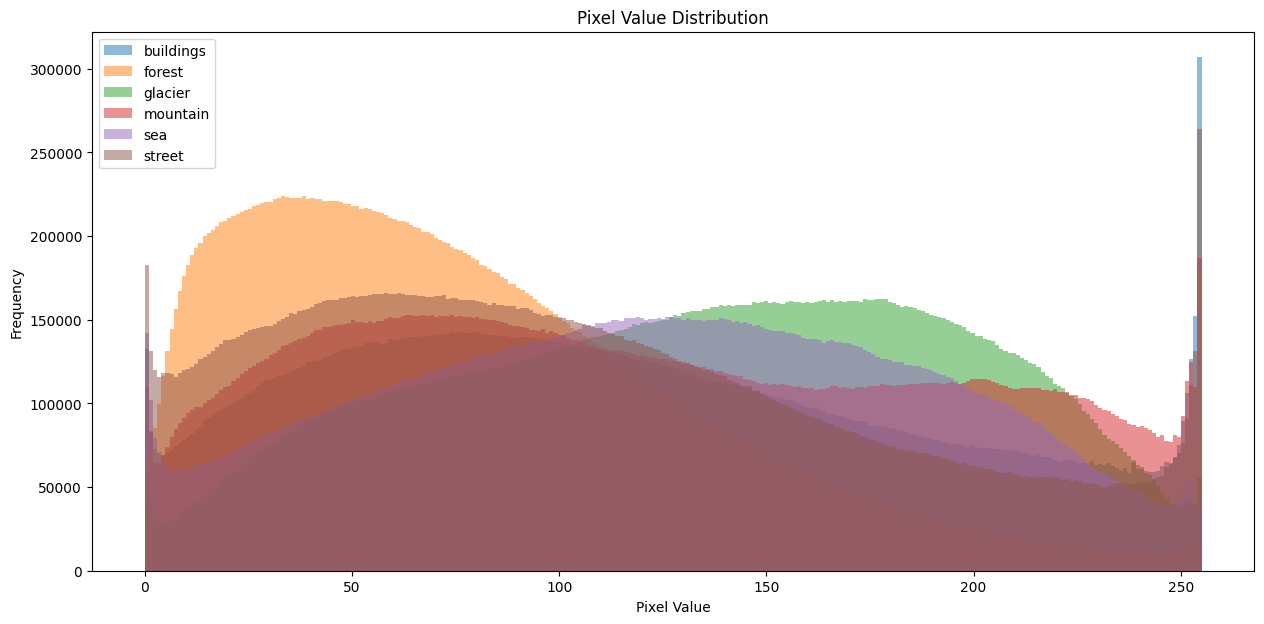

In [4]:
from PIL import Image

categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Plot pixel value distribution for each category
def plot_pixel_value_distribution(category, img_size=(64, 64)):
    category_path = os.path.join(train_dir, category)
    pixel_values = []
    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        img = Image.open(img_path).resize(img_size)
        img_array = np.array(img).flatten()
        pixel_values.extend(img_array)
    plt.hist(pixel_values, bins=256, alpha=0.5, label=category)

plt.figure(figsize=(15, 7))
for category in categories:
    plot_pixel_value_distribution(category)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Interpretation of the Pixel Value Distribution Chart

The pixel value distribution chart shows the frequency of pixel values (ranging from 0 to 255) for each image category (`buildings`, `forest`, `glacier`, `mountain`, `sea`, `street`). Here are some important insights that can be derived from the chart:

1. **Overall Pixel Value Distribution**:
    - The pixel value distributions for all categories indicate a high frequency of low values (near 0), suggesting the presence of dark areas in the images.
    - There are also noticeable peaks near the value 255, indicating the presence of very bright or white areas in some categories.

2. **Comparison Between Categories**:
    - **Buildings**: The pixel distribution for buildings shows significant peaks at both low and high values, suggesting considerable brightness variation, likely due to shadows and illuminated areas.
    - **Forest**: This category shows a smoother distribution with fewer extreme peaks, indicating less brightness variation, likely due to the uniform tree cover.
    - **Glacier**: Exhibits a high frequency of higher values, indicating many bright areas in the glacier images.
    - **Mountain**: Has a relatively balanced distribution with peaks at low and medium values, suggesting moderate brightness variation.
    - **Sea**: The distribution shows peaks at both low and medium values, indicating brightness variation due to the reflective water surface and shadow areas.
    - **Street**: Displays peaks at low, medium, and high values, indicating significant brightness variation due to the mix of dark surfaces, vehicles, and artificial lighting.

3. **Specific Insights**:
    - **Buildings and Streets** show a large variation in brightness, likely due to the presence of strong shadows and artificially illuminated areas.
    - **Forests and Mountains** tend to have smoother distributions, reflecting less extreme brightness variation.
    - **Glaciers** show a tendency towards higher pixel values, likely due to the reflectance of snow and ice.

### Conclusions and Implications

1. **Preprocessing and Normalization**:
    - Normalizing the image data (already applied) is crucial to ensure all categories are treated fairly during model training, especially considering the large variations in brightness observed.

2. **Model Improvement**:
    - Computer vision models may need specific adjustments to handle categories with significant brightness variation, such as `buildings` and `streets`.
    - Implementing data augmentation techniques, such as brightness and contrast adjustment, can help the model generalize better and handle the variability observed in the data.

3. **Feature Analysis**:
    - Understanding pixel distributions can inform the selection of features and feature extraction techniques that are robust to brightness and contrast variations.
    - Noise reduction and edge enhancement techniques may be particularly useful for categories with extreme brightness variation.

This pixel value distribution chart provides critical insights into the characteristics of the image data, which can inform various stages of the machine learning pipeline, from preprocessing to model selection and tuning.